In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

df=pd.read_csv("Customer Churn.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


After going through data we got that there are many place in TotalCharges is blank so that we will replace blank with 0 and will change the data type of TotalCharges into float.

In [4]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")

In [5]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [6]:
# df.isnull()

In [7]:
# df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["TotalCharges"].sum()

np.float64(16056168.7)

In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

In [11]:
df["SeniorCitizen"].unique()

array([0, 1])

In [12]:
def conv(value):
    if value==1:
        return "Yes"
    else: 
        return "No"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


we have converted 0 and 1 from senior citizen section into yes for 1 and no for 0 


Text(0.5, 1.0, 'Churn customer count')

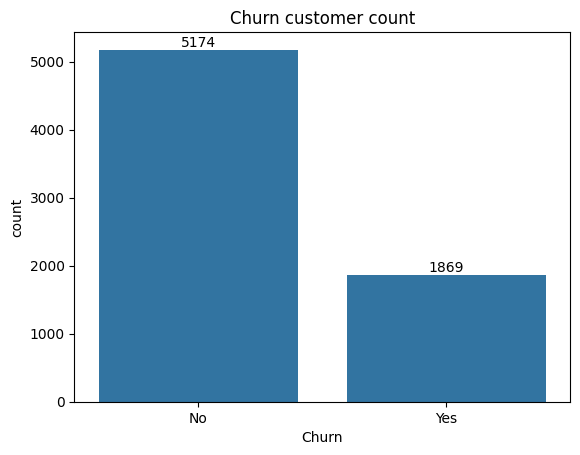

In [13]:
ax=sns.countplot(x="Churn",data=df)
# for bars in ax.containers:
#     ax.bar_label(bars)
ax.bar_label(ax.containers[0])
plt.title("Churn customer count")

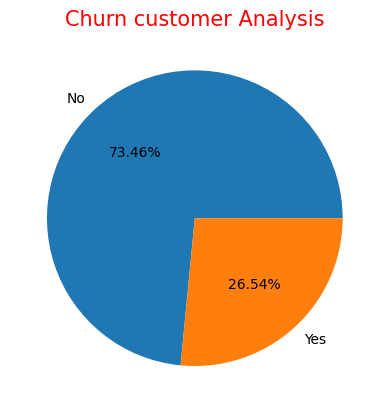

In [37]:
gb=df.groupby(["Churn"]).agg({"Churn":"count"})
gb
# plt.figure(figsize=(6,6))
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Churn customer Analysis", fontsize=15, color="red")
plt.show()

From above graph we can say 26.54% customer has churned out from our services. Now we will analyze over and and find out more insight to understand cause of customer chur.


In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Text(0.5, 1.0, 'Countplot of Gender with churn data')

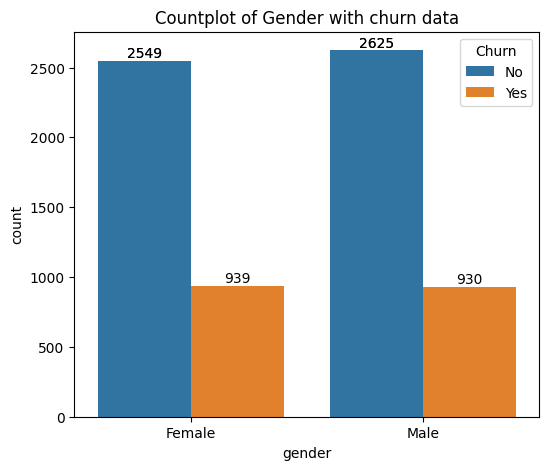

In [51]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x="gender",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Countplot of Gender with churn data")

Text(0.5, 1.0, 'Count plot Senior Citizen')

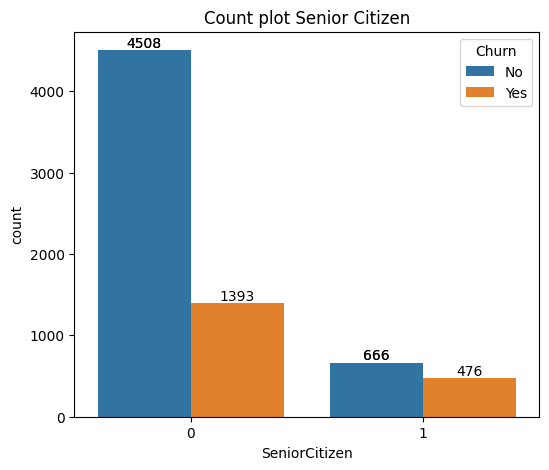

In [50]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count plot Senior Citizen")

In [17]:
gb=df.groupby(["SeniorCitizen","Churn"]).size().unstack(fill_value=0)
gb

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


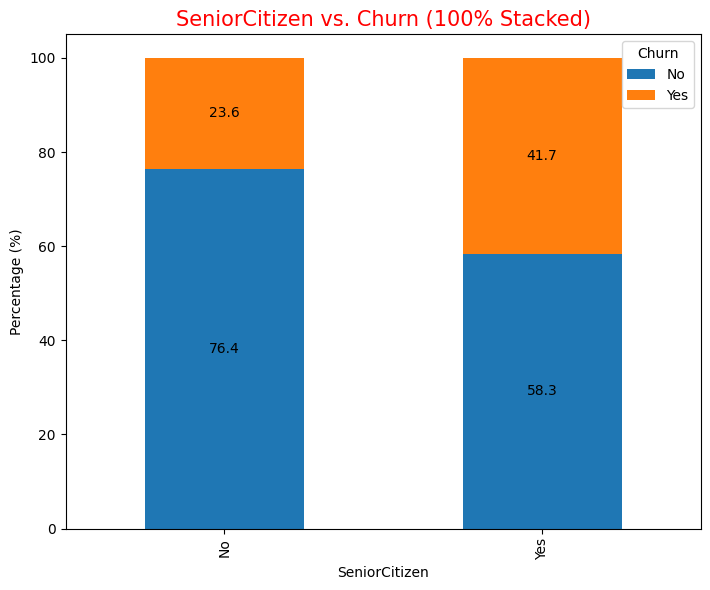

In [18]:
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# 2. Convert raw counts to row-wise percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# 3. Define custom colors (one for each Churn category)
custom_colors = ["#1f77b4", "#ff7f0e"]  # adjust if you have more categories

# 4. Plot a 100% stacked bar chart with custom colors
ax = ct_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 6),
    color=custom_colors
)

# 5. Add labels and title
plt.title("SeniorCitizen vs. Churn (100% Stacked)", fontsize=15, color="red")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage (%)")

# 6. Add data labels on top of each segment
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="center")

# 7. Legend and layout
plt.legend(title="Churn", bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

After analysing data as it is given in above graphg we found that churn ratio of senior citizen customer is higher.

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Countplot with tenure')

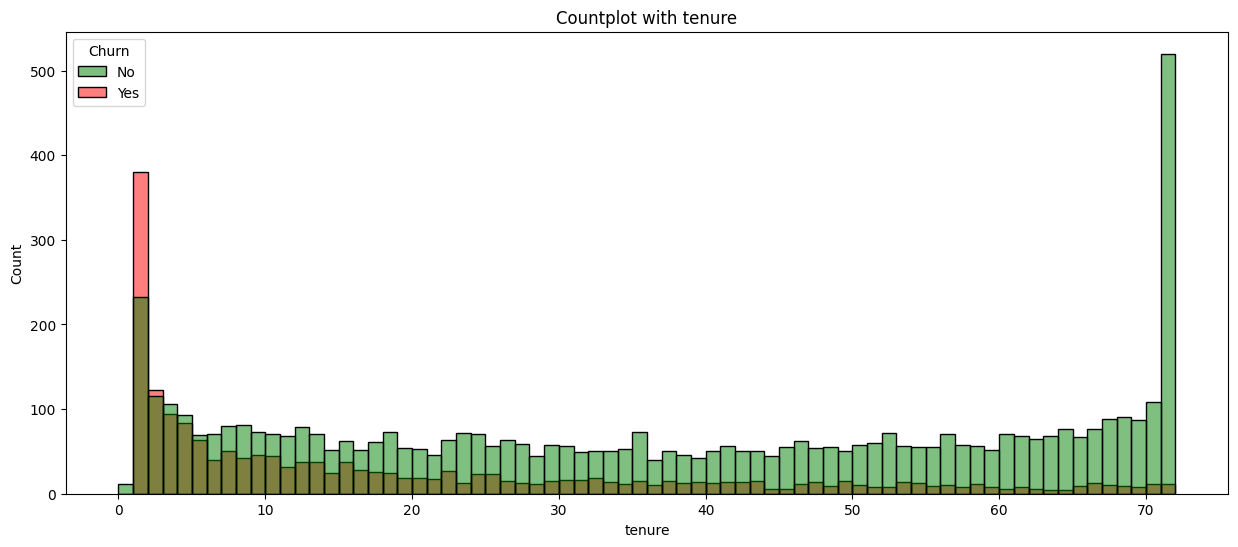

In [52]:
plt.figure(figsize=(15,6))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn",palette={"No": "green", "Yes": "red"})
plt.title("Countplot with tenure")

After analysing tenure and churn column we found that ration of churn customer with long term tenure is high and with long term tenure is low 


In [ ]:
df.groupby(["gender"])["gender"].count()

gender
Female    3488
Male      3555
Name: gender, dtype: int64

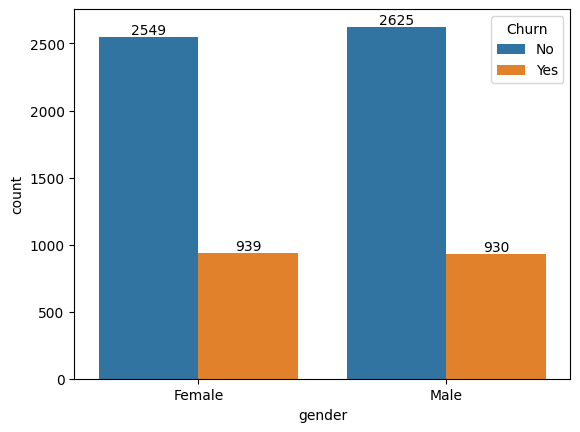

In [28]:
ax=sns.countplot(x="gender",data=df,hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Count plot of Contract with Churn')

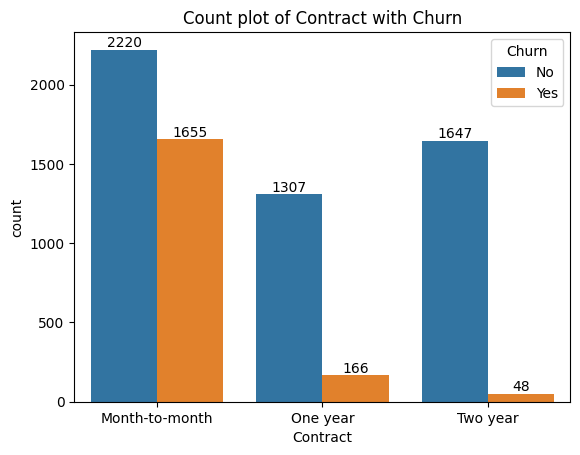

In [ ]:
ax=sns.countplot(x="Contract",data=df,hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count plot of Contract with Churn")

After analysing "Churn" and "Contract" we found that ration of customer churn with Month-to-month payment contract is very high


In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

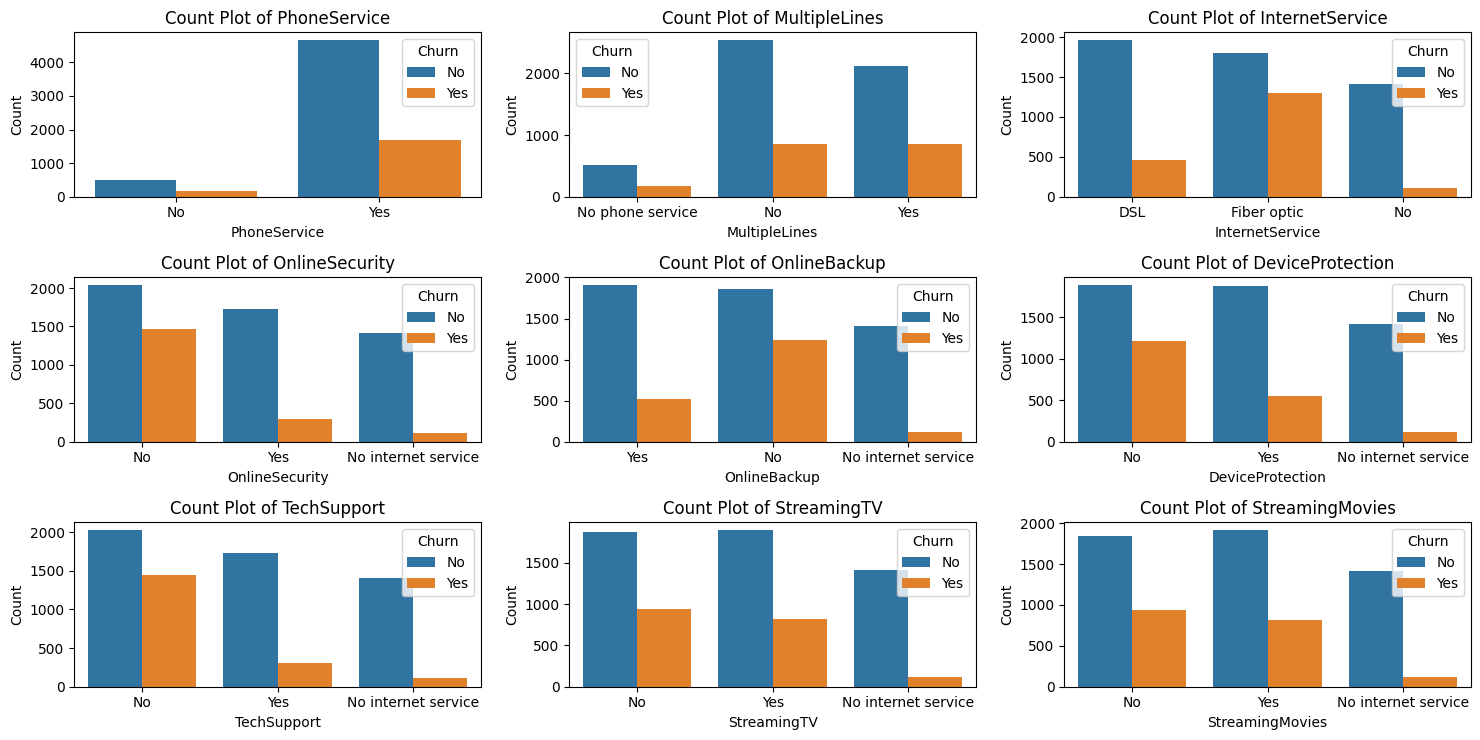

In [59]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define the number of columns for subplots
n_cols = 3  
n_rows = math.ceil(len(columns) / n_cols)  # Calculate required rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2.5))  

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate through columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, hue="Churn" ,ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Insights from the Count Plots:

1️⃣ Customers without additional services (Online Security, Tech Support, Device Protection, etc.) have a higher churn rate, indicating these services might improve retention.

2️⃣ Fiber optic internet users have a higher churn rate compared to DSL users, suggesting possible dissatisfaction with service quality or pricing.

3️⃣ Users with multiple lines and streaming services also show churn, but the gap is smaller, meaning these services may have less impact on retention.

4️⃣ "No internet service" customers have lower churn, possibly indicating they use fewer services and are less likely to switch providers.

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

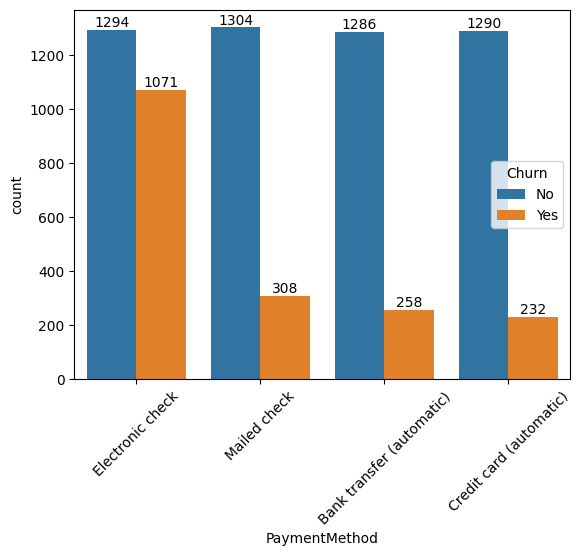

In [57]:
ax=sns.countplot(x="PaymentMethod",data=df,hue ="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)

From above graph we can say customer with Electronic check payment method have higher churn rate than any other payment method 

